In [21]:
# For EDA
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# For model
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet, BayesianRidge
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

import warnings
warnings.filterwarnings('ignore', category=FutureWarning)

In [23]:
df = pd.read_csv('apple_stock.csv')
df.head(5)

,Unnamed: 0,Adj Close,Close,High,Low,Open,Volume
0,1980-12-12,0.098834,0.128348,0.128906,0.128348,0.128348,469033600
1,1980-12-15,0.093678,0.121652,0.122210,0.121652,0.122210,175884800
2,1980-12-16,0.086802,0.112723,0.113281,0.112723,0.113281,105728000
3,1980-12-17,0.088951,0.115513,0.116071,0.115513,0.115513,86441600
4,1980-12-18,0.091530,0.118862,0.119420,0.118862,0.118862,73449600


In [19]:
df.head(10)

,Unnamed: 0,Adj Close,Close,High,Low,Open,Volume
0,1980-12-12,0.098834,0.128348,0.128906,0.128348,0.128348,469033600
1,1980-12-15,0.093678,0.121652,0.122210,0.121652,0.122210,175884800
2,1980-12-16,0.086802,0.112723,0.113281,0.112723,0.113281,105728000
3,1980-12-17,0.088951,0.115513,0.116071,0.115513,0.115513,86441600
4,1980-12-18,0.091530,0.118862,0.119420,0.118862,0.118862,73449600
5,1980-12-19,0.097116,0.126116,0.126674,0.126116,0.126116,48630400
6,1980-12-22,0.101842,0.132254,0.132813,0.132254,0.132254,37363200
7,1980-12-23,0.106140,0.137835,0.138393,0.137835,0.137835,46950400
8,1980-12-24,0.111726,0.145089,0.145647,0.145089,0.145089,48003200
9,1980-12-26,0.122039,0.158482,0.159040,0.158482,0.158482,55574400


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11107 entries, 0 to 11106
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  11107 non-null  object 
 1   Adj Close   11107 non-null  float64
 2   Close       11107 non-null  float64
 3   High        11107 non-null  float64
 4   Low         11107 non-null  float64
 5   Open        11107 non-null  float64
 6   Volume      11107 non-null  int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 607.5+ KB


In [27]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Adj Close,11107.0,2.352223e+01,4.976788e+01,0.037815,2.434021e-01,4.466817e-01,1.826009e+01,2.590200e+02
Close,11107.0,2.435761e+01,5.021750e+01,0.049107,3.002900e-01,5.424110e-01,2.139714e+01,2.590200e+02
High,11107.0,2.459817e+01,5.069190e+01,0.049665,3.063620e-01,5.533930e-01,2.156929e+01,2.601000e+02
Low,11107.0,2.409261e+01,4.968263e+01,0.049107,2.924110e-01,5.345980e-01,2.111572e+01,2.576300e+02
Open,11107.0,2.433908e+01,5.016682e+01,0.049665,3.000895e-01,5.426790e-01,2.136768e+01,2.581900e+02
Volume,11107.0,3.154341e+08,3.348735e+08,0.000000,1.111164e+08,2.036944e+08,3.960418e+08,7.421641e+09


In [29]:
print("Missing Value (%)")
missing_values = df.isna().mean() * 100
print(missing_values)

print("\nDuplicate Rows (%):")
duplicate_count = df.duplicated().mean()
print(duplicate_count)

Missing Value (%)
Unnamed: 0    0.0
Adj Close     0.0
Close         0.0
High          0.0
Low           0.0
Open          0.0
Volume        0.0
dtype: float64

Duplicate Rows (%):
0.0


In [31]:
def outlier_check(row, colname):  
    Q1 = row[colname].quantile(0.25)
    Q3 = row[colname].quantile(0.75)
    IQR = Q3 - Q1
    lower_b = Q1 - 1.5 * IQR
    upper_b = Q3 + 1.5 * IQR
    outlier = row.loc[(row[colname] < lower_b) | (row[colname] > upper_b)]
    return outlier
    
outliers = pd.DataFrame() 

for col in df.select_dtypes(include=['number']).columns: 
    outliers_in_col = outlier_check(df, col) 
    outliers = pd.concat([outliers, outliers_in_col])

outliers.reset_index(drop=True, inplace=True)
outliers

,Unnamed: 0,Adj Close,Close,High,Low,Open,Volume
0,2018-06-04,45.486938,47.957500,48.355000,47.837502,47.910000,105064800
1,2018-06-05,45.837868,48.327499,48.485001,48.090000,48.267502,86264000
2,2018-06-06,45.996738,48.494999,48.520000,47.980000,48.407501,83734400
3,2018-06-07,45.873440,48.365002,48.549999,48.084999,48.535000,85388800
4,2018-06-08,45.456097,47.924999,48.000000,47.442501,47.792500,106627200
...,...,...,...,...,...,...,...
7928,2013-04-17,12.314143,14.385714,15.021429,14.218214,15.009643,945056000
7929,2013-04-24,12.395465,14.480714,14.830357,14.017857,14.055000,969651200
7930,2013-08-13,15.165369,17.484644,17.666430,16.716070,16.819286,881941200
7931,2013-09-11,14.488215,16.703930,16.917500,16.600357,16.678928,898696400


EDA : Data Distribution

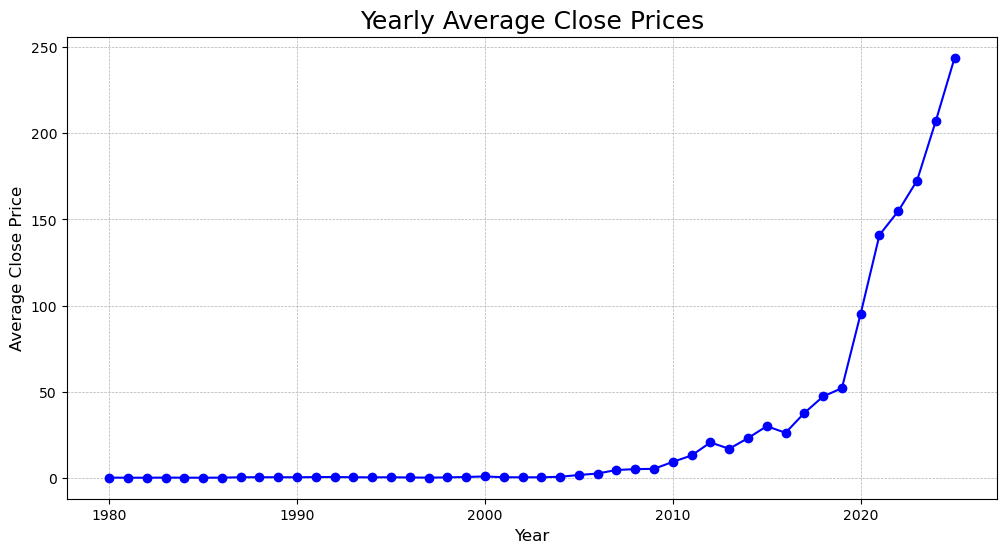

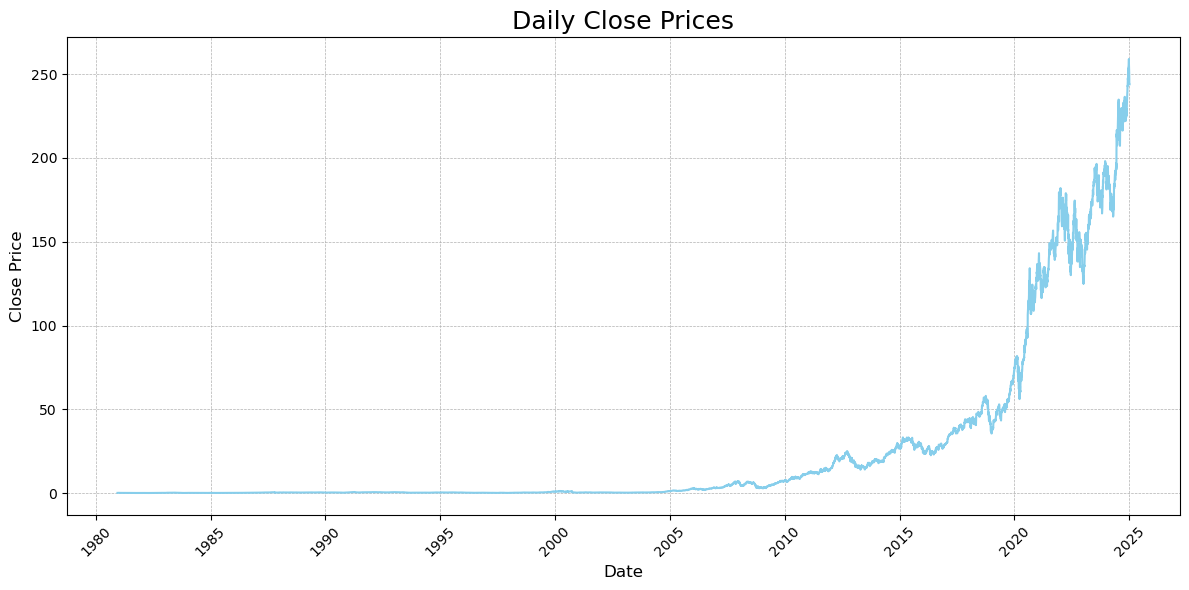

In [35]:
df["Unnamed: 0"] = pd.to_datetime(df["Unnamed: 0"], utc=True)  
df["Unnamed: 0"] = df["Unnamed: 0"].dt.tz_convert(None)  

df["Year"] = df["Unnamed: 0"].dt.year
yearly_data = df.groupby("Year")["Close"].mean()
daily_data = df.groupby("Unnamed: 0")["Close"].mean()

plt.figure(figsize=(12, 6))
plt.plot(yearly_data.index, yearly_data.values, marker="o", color="blue")
plt.title("Yearly Average Close Prices", fontsize=18)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Average Close Price", fontsize=12)
plt.grid(visible=True, linestyle="--", linewidth=0.5)
plt.show()

plt.figure(figsize=(12, 6))
plt.plot(daily_data.index, daily_data.values, color="skyblue")
plt.title("Daily Close Prices", fontsize=18)
plt.xlabel("Date", fontsize=12)
plt.ylabel("Close Price", fontsize=12)
plt.xticks(rotation=45)
plt.grid(visible=True, linestyle="--", linewidth=0.5)
plt.tight_layout()
plt.show()

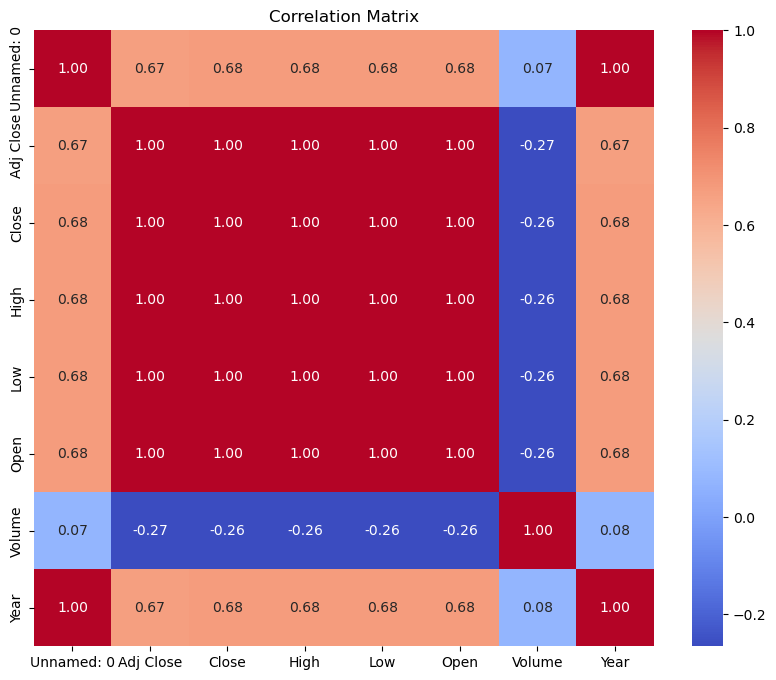

In [37]:
correlation_matrix = df.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

Comparison of regression model performance

In [47]:
X = df[['Open', 'High', 'Low']]
y = df['Close']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

models = {
    "Linear Regression": LinearRegression(),
    "ElasticNet": ElasticNet(alpha=0.1, l1_ratio=0.5, max_iter=10000, tol=1e-4),  
    "SVR": SVR(kernel='rbf', C=1.0, epsilon=0.1),
    "KNN": KNeighborsRegressor(n_neighbors=3),
    "Decision Tree": DecisionTreeRegressor(random_state=42),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
    "Bayesian Ridge": BayesianRidge(),
    "Polynomial Regression": make_pipeline(PolynomialFeatures(degree=2), LinearRegression()),
    "MLP Regressor": MLPRegressor(hidden_layer_sizes=(100, 50), max_iter=500, random_state=42),
}

def evaluate_model(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)  
    y_pred = model.predict(X_test)  

    mse = mean_squared_error(y_test, y_pred)  
    r2 = r2_score(y_test, y_pred)  
    
    return mse, r2

In [49]:
results = {}

for name, model in models.items():
    mse, r2 = evaluate_model(model, X_train, X_test, y_train, y_test)
    results[name] = {"MSE": mse, "R²": r2}

results_df = pd.DataFrame(results).T
results_df = results_df.sort_values(by="R²", ascending=False)

results_df

,MSE,R²
Polynomial Regression,0.102511,0.999958
Bayesian Ridge,0.104682,0.999957
Linear Regression,0.104685,0.999957
KNN,0.178950,0.999926
Random Forest,0.186543,0.999923
ElasticNet,0.195200,0.999920
Decision Tree,0.269159,0.999889
MLP Regressor,0.285177,0.999882
SVR,11.008285,0.995463


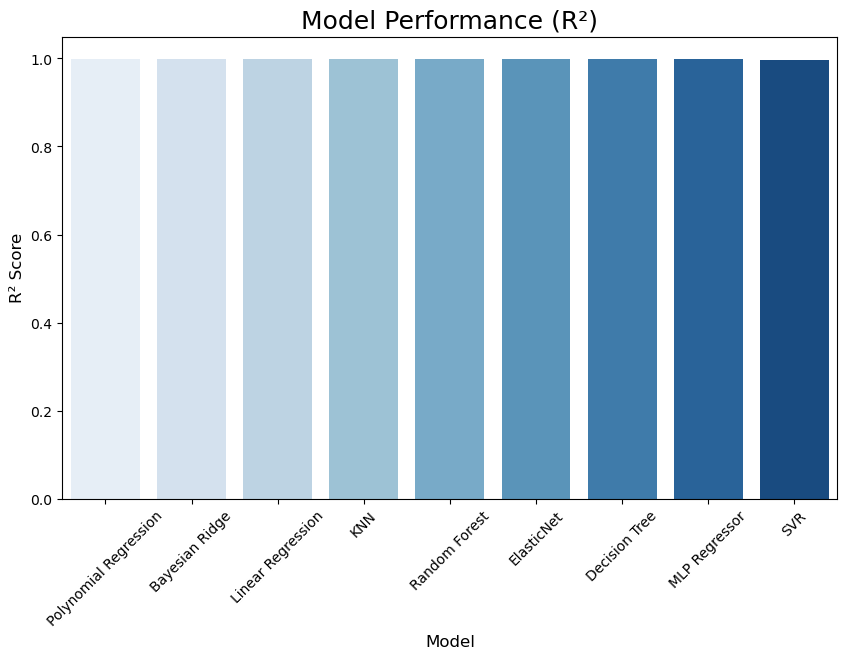

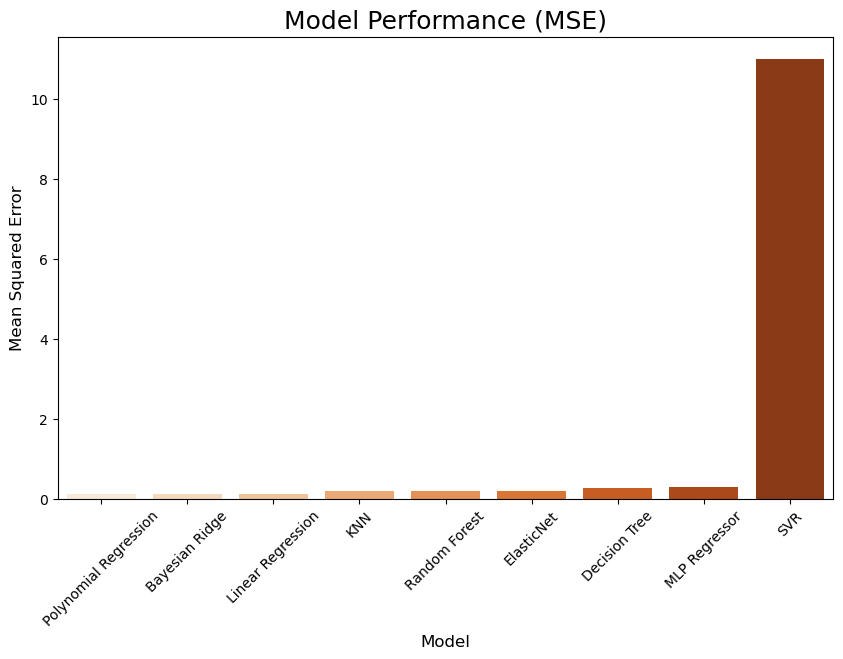

Best Model:
MSE    0.102511
R²     0.999958
Name: Polynomial Regression, dtype: float64


In [51]:
plt.figure(figsize=(10, 6))
sns.barplot(x=results_df.index, y="R²", data=results_df, palette="Blues")
plt.title("Model Performance (R²)", fontsize=18)
plt.xlabel("Model", fontsize=12)
plt.ylabel("R² Score", fontsize=12)
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(10, 6))
sns.barplot(x=results_df.index, y="MSE", data=results_df, palette="Oranges")
plt.title("Model Performance (MSE)", fontsize=18)
plt.xlabel("Model", fontsize=12)
plt.ylabel("Mean Squared Error", fontsize=12)
plt.xticks(rotation=45)
plt.show()

best_model = results_df.loc[results_df["R²"].idxmax()]
print("Best Model:")
print(best_model)

In [53]:
Degree = 10  
list_MSE = []
list_R2 = []

for degree in range(1, Degree + 1):
    poly = PolynomialFeatures(degree=degree)
    X_train_poly = poly.fit_transform(X_train)
    X_test_poly = poly.transform(X_test)
    model = LinearRegression()
    model.fit(X_train_poly, y_train)
    y_pred = model.predict(X_test_poly)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    list_MSE.append((degree, mse))
    list_R2.append((degree,r2))
    print(f'Degree {degree}: MSE = {mse}, R2 = {r2}')

Degree 1: MSE = 0.10468481927887877, R2 = 0.999956856292547
Degree 2: MSE = 0.10251100848481814, R2 = 0.9999577521842111
Degree 3: MSE = 0.09858832064481268, R2 = 0.9999593688397852
Degree 4: MSE = 0.10647710463821132, R2 = 0.9999561176387886
Degree 5: MSE = 0.11137235254378786, R2 = 0.9999541001624724
Degree 6: MSE = 0.15935655399037438, R2 = 0.999934324455127
Degree 7: MSE = 1017.8296524272116, R2 = 0.5805223234485597
Degree 8: MSE = 681.6639954097521, R2 = 0.7190661243741833
Degree 9: MSE = 22078.962049330996, R2 = -8.099392692121556
Degree 10: MSE = 180785.54818439574, R2 = -73.50706660552125


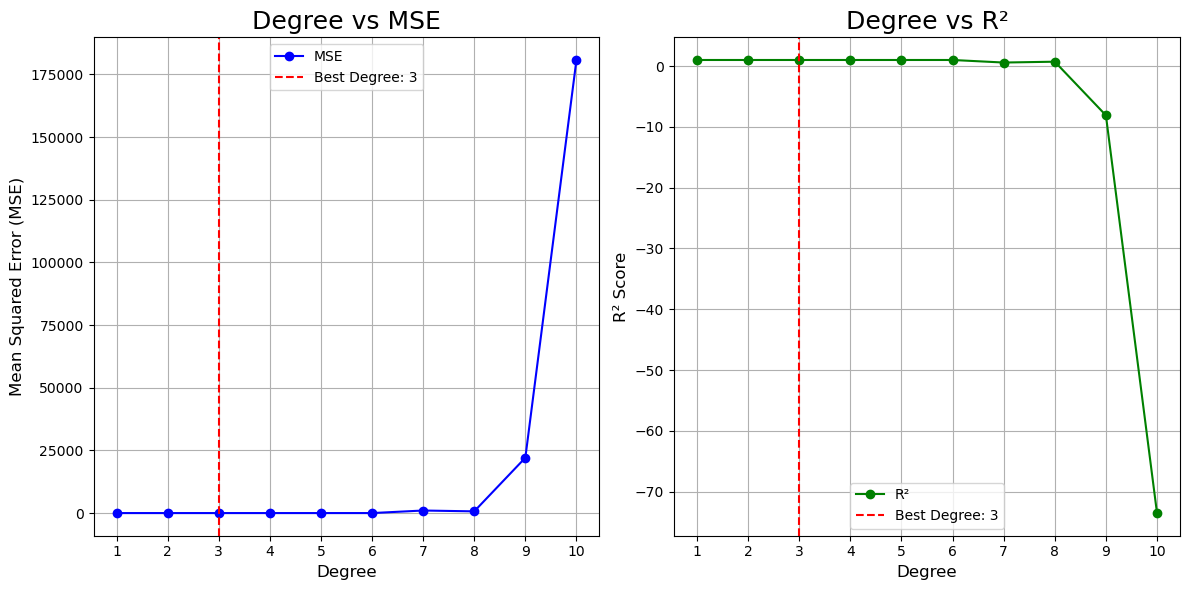

Best Degree for MSE: 3
Best Degree for R²: 3


In [55]:
degrees, mse_values = zip(*list_MSE)
_, r2_values = zip(*list_R2)

best_degree_mse = degrees[mse_values.index(min(mse_values))] 
best_degree_r2 = degrees[r2_values.index(max(r2_values))]  

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(degrees, mse_values, marker='o', label='MSE', color='blue')
plt.axvline(best_degree_mse, color='red', linestyle='--', label=f'Best Degree: {best_degree_mse}')
plt.title('Degree vs MSE', fontsize=18)
plt.xlabel('Degree', fontsize=12)
plt.ylabel('Mean Squared Error (MSE)', fontsize=12)
plt.grid(True)
plt.xticks(degrees)
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(degrees, r2_values, marker='o', label='R²', color='green')
plt.axvline(best_degree_r2, color='red', linestyle='--', label=f'Best Degree: {best_degree_r2}')
plt.title('Degree vs R²', fontsize=18)
plt.xlabel('Degree', fontsize=12)
plt.ylabel('R² Score', fontsize=12)
plt.grid(True)
plt.xticks(degrees)
plt.legend()

plt.tight_layout()
plt.show()

print(f'Best Degree for MSE: {best_degree_mse}')
print(f'Best Degree for R²: {best_degree_r2}')

Conclusion

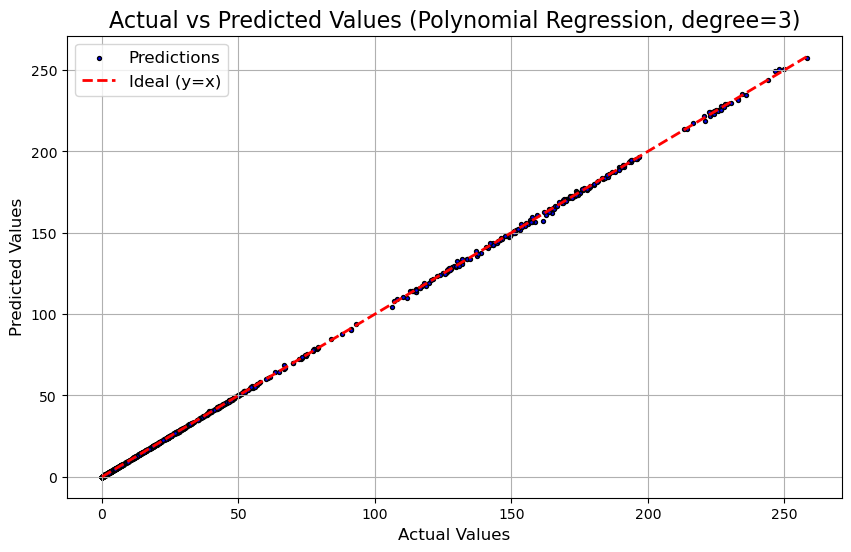

Polynomial Regression (degree=3) Result: MSE = 0.09858832064481268, R² = 0.9999593688397852


In [58]:
degree = 3
poly = PolynomialFeatures(degree=degree)

X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

model = LinearRegression()
model.fit(X_train_poly, y_train)

y_pred = model.predict(X_test_poly)

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', s=8, edgecolor='black', label='Predictions')

plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', linewidth=2, label='Ideal (y=x)')

plt.title(f'Actual vs Predicted Values (Polynomial Regression, degree={degree})', fontsize=16)
plt.xlabel('Actual Values', fontsize=12)
plt.ylabel('Predicted Values', fontsize=12)
plt.legend(fontsize=12)
plt.grid()
plt.show()

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Polynomial Regression (degree={degree}) Result: MSE = {mse}, R² = {r2}')